In [1]:
import sqlite3

# Create database and connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

# Sample data
data = [
    ("Apple", 10, 2.5),
    ("Apple", 5, 2.5),
    ("Banana", 20, 1.0),
    ("Banana", 15, 1.0),
    ("Mango", 7, 3.0),
    ("Mango", 10, 3.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()
conn.close()

print("Database created & sample data inserted!")


Database created & sample data inserted!



=== Sales Summary ===
  product  total_qty  revenue
0   Apple         15     37.5
1  Banana         35     35.0
2   Mango         17     51.0


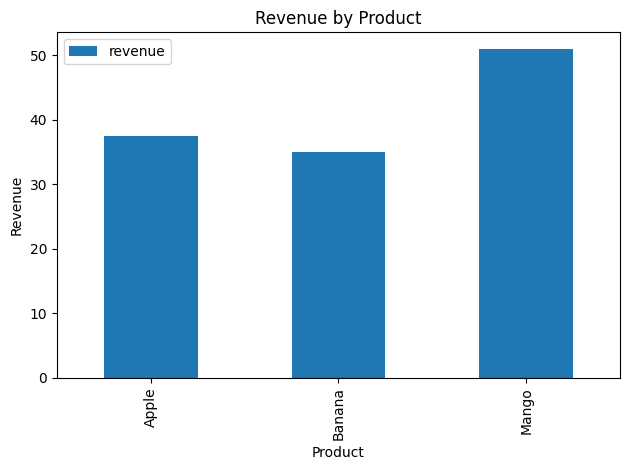

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# SQL query
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas
df = pd.read_sql_query(query, conn)

# Print results
print("\n=== Sales Summary ===")
print(df)

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product')
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

# Optional: save chart
# plt.savefig("sales_chart.png")

conn.close()
